**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
import datetime as dt

**Importing Dataset :** The dataset we will use here to perform the analysis and build a predictive model is Infosys Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 3rd January 2000 to 30th December 2022 which is for 22 years for the Infosys stocks.

In [ ]:
# Read dataset and see first ten rows
df=pd.read_csv("/content/drive/MyDrive/INFY.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.890625,5.906250,5.462891,5.767578,3.913799,5331200
1,2000-01-04,5.641113,6.281250,5.570313,5.812500,3.944282,5056000
2,2000-01-05,5.476563,5.855469,5.328125,5.765625,3.912475,6054400
3,2000-01-06,5.598633,5.703125,5.156250,5.156250,3.498962,4704000
4,2000-01-07,4.945313,5.515625,4.703125,5.515625,3.742828,7884800
5,2000-01-10,5.812500,5.847656,5.546875,5.593750,3.795842,3532800
6,2000-01-11,5.441406,5.442383,5.149414,5.265625,3.573181,8512000
7,2000-01-12,5.375000,5.546875,4.906250,5.171875,3.509563,3968000
8,2000-01-13,5.343750,5.343750,4.875000,4.968750,3.371726,2560000
9,2000-01-14,5.100586,5.269531,4.644531,4.658203,3.160994,7091200


In [ ]:
# check last five entries
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5782,2022-12-23,17.820000,17.950001,17.73,17.920000,17.920000,3685100
5783,2022-12-27,18.010000,18.090000,17.84,18.030001,18.030001,4943200
5784,2022-12-28,18.049999,18.190001,17.92,17.959999,17.959999,5872100
5785,2022-12-29,18.090000,18.379999,18.09,18.240000,18.240000,4971600
5786,2022-12-30,18.090000,18.180000,17.85,18.010000,18.010000,4468300


From the first ten rows, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [ ]:
df.shape 

(5787, 7)

From this, we got to know that there are 5787 rows of data available and for each row, we have 7 different features or columns.

In [ ]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5787 non-null   object 
 1   Open       5787 non-null   float64
 2   High       5787 non-null   float64
 3   Low        5787 non-null   float64
 4   Close      5787 non-null   float64
 5   Adj Close  5787 non-null   float64
 6   Volume     5787 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.6+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5.787000e+03
mean,7.477093,7.559846,7.392994,7.477786,6.304148,1.165400e+07
std,4.893667,4.924424,4.864108,4.895696,5.025273,9.102631e+06
min,1.015938,1.070938,0.956250,1.031875,0.701403,3.360000e+05
25%,4.466875,4.530625,4.405625,4.470625,3.154488,6.126400e+06
50%,6.706250,6.765000,6.637500,6.700000,5.121497,9.566400e+06
75%,8.783750,8.866250,8.680000,8.775000,7.239282,1.456960e+07
max,26.150000,26.389999,25.580000,26.200001,25.631620,1.475912e+08


**Exploratory Data Analysis :**

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

While performing the EDA of the Infosys Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.



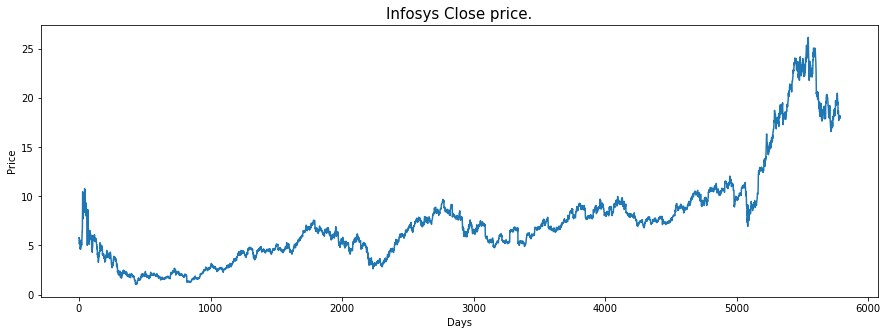

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Infosys Close price.', fontsize=15)
plt.xlabel("Days")
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Stock Price of Infosys over the Years')

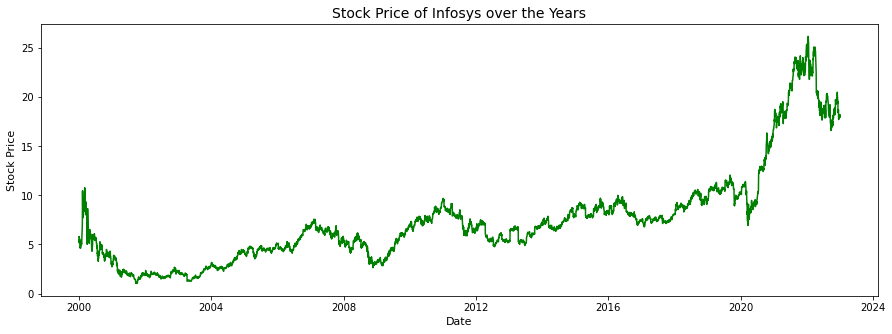

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d %H:%M:%S')
df.index = df['Date']
plt.figure(figsize=(15,5))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=11)
plt.ylabel('Stock Price',size=11)
plt.title('Stock Price of Infosys over the Years',size=14)

The prices of stocks are showing an upward and somewhere downward trend as depicted by the plot of the closing price of the stocks.

In [ ]:
df = df.drop(['Adj Close'], axis=1)

 So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

**Now lets check for the Null values in the Dataframe:**

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

**Now let’s draw the distribution plot for the continuous features given in the dataset.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

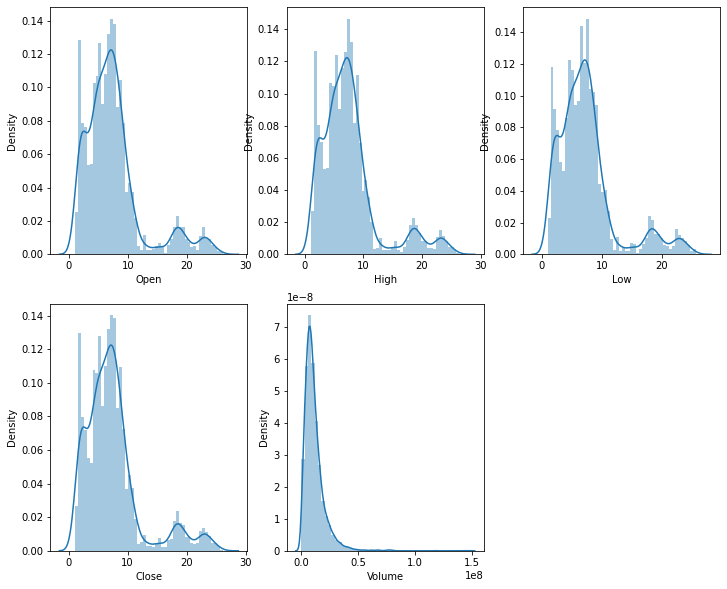

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(12,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed

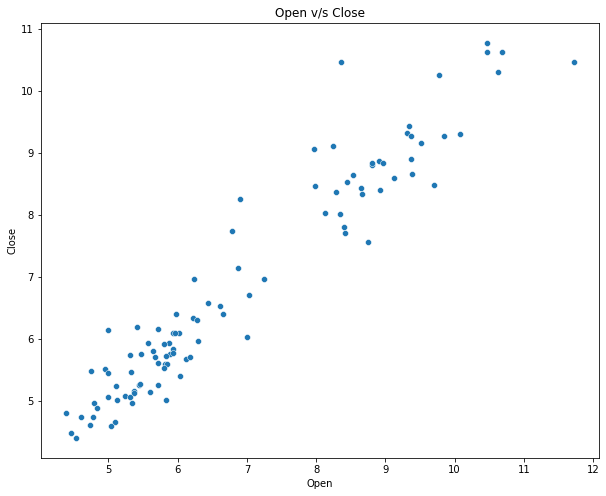

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
plot1 = sns.scatterplot(data=df.head(100), x="Open", y="Close", ax=ax)
plot1.set(title='Open v/s Close')
plt.show()

**MODEL BUILDING:**

**Data Splitting and Normalization:**

In [ ]:
features = df[['Open','High','Low']]
target = df['Close']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)


(4629, 3) (1158, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

**Model Development and Evaluation:**

Now is the time to train some state-of-the-art machine learning models(Linear Regression,Logistic Regression, Support Vector Machine, Decision Tree, Random Forest ), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.


**Linear Regression:**

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
     

print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("R2 score",r2_score(y_test,y_pred1))

MAE 0.034886762641324065
MSE 0.0025199650072413276
R2 score 0.9999016543294509


In [ ]:
print("Co-efficient: ", model1.coef_)
print("\nIntercept: ", model1.intercept_)

Co-efficient:  [-2.66972039  3.98794818  3.57698106]

Intercept:  7.477741435727825


In [ ]:
df1 = pd.DataFrame(list(zip(y_test, y_pred1)), columns=["Actual Values", "Predicted Values"])

In [ ]:
df1.head().style.hide_index()

Actual Values,Predicted Values
11.700000,11.643864
9.300000,9.260724
2.370938,2.403449
5.910000,5.912094
4.355469,4.317002


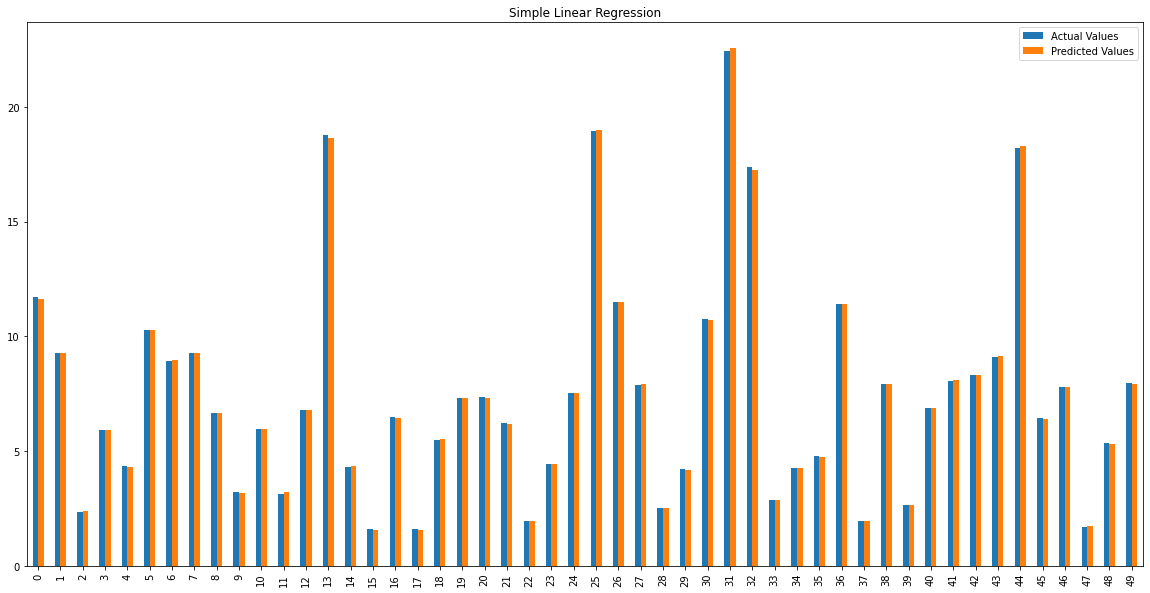

In [ ]:
df1.head(50).plot(kind="bar", figsize=(20, 10), title='Simple Linear Regression')
plt.show()

**Support Vector Machine (SVR)**

In [ ]:
model2 = SVR(kernel="rbf", gamma = 0.01, C=100)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred2))
print("MSE",mean_squared_error(y_test,y_pred2))
print("R2 score",r2_score(y_test,y_pred2))

MAE 0.0400496233287711
MSE 0.003123979182505276
R2 score 0.9998780817088324


In [ ]:
df2 = pd.DataFrame(list(zip(y_test, y_pred2)), columns=["Actual Values", "Predicted Values"])
df2.head().style.hide_index()

Actual Values,Predicted Values
11.700000,11.643330
9.300000,9.264616
2.370938,2.407545
5.910000,5.901697
4.355469,4.308255


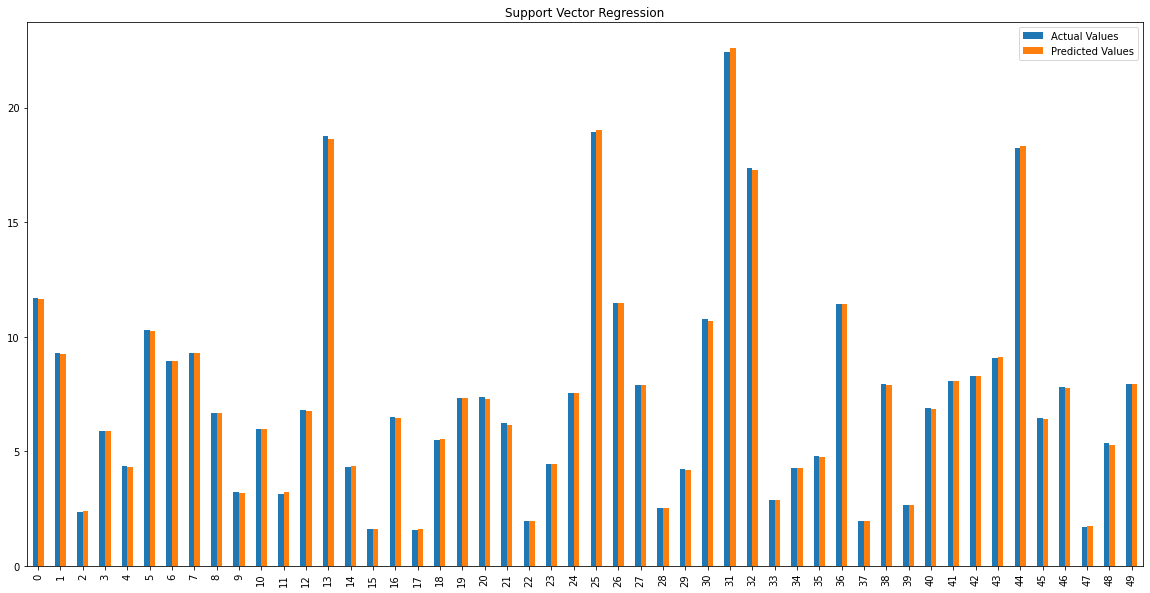

In [ ]:
df2.head(50).plot(kind="bar", figsize=(20, 10), title='Support Vector Regression')
plt.show()

**Decision Tree Regressor**

In [ ]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred3))
print("MSE",mean_squared_error(y_test,y_pred3))
print("R2 score",r2_score(y_test,y_pred3))

MAE 0.05472077461139895
MSE 0.007854960306968051
R2 score 0.9996934475930002


In [ ]:
df3 = pd.DataFrame(list(zip(y_test, y_pred3)), columns=["Actual Values", "Predicted Values"])
df3.head().style.hide_index()

Actual Values,Predicted Values
11.700000,11.600000
9.300000,9.300000
2.370938,2.357813
5.910000,5.912500
4.355469,4.366250


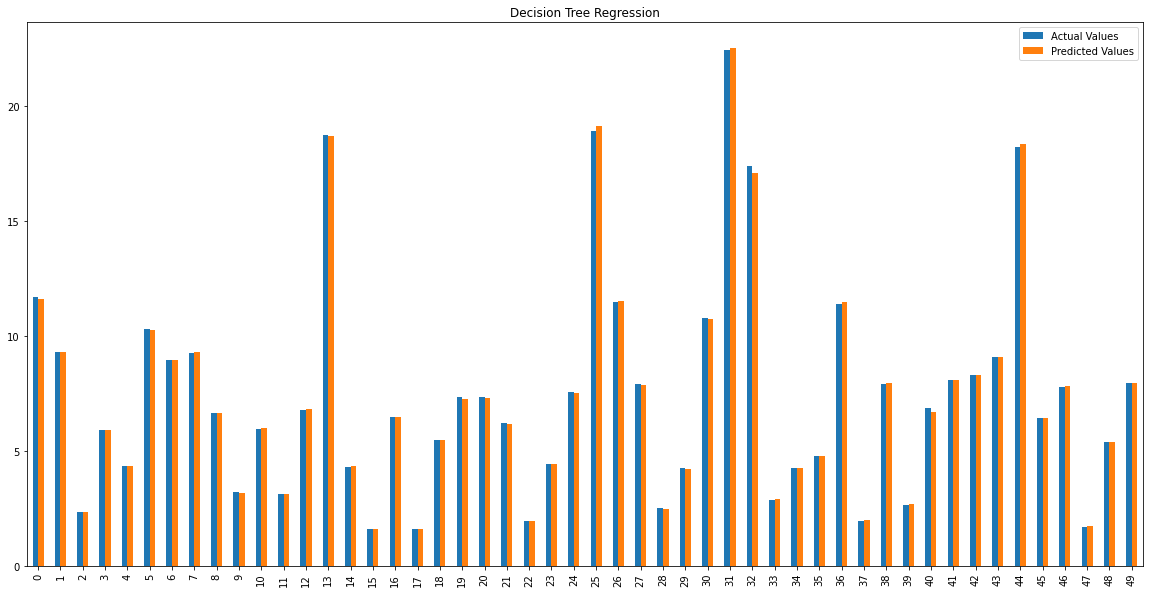

In [ ]:
df3.head(50).plot(kind="bar", figsize=(20, 10), title='Decision Tree Regression')
plt.show()

**By Random Forest:**

In [ ]:
model4 = RandomForestRegressor(n_estimators=100)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred4))
print("MSE",mean_squared_error(y_test,y_pred4))
print("R2 score",r2_score(y_test,y_pred4))

MAE 0.04322891430051818
MSE 0.004462978142224509
R2 score 0.9998258251298007


In [ ]:
df4 = pd.DataFrame(list(zip(y_test, y_pred4)), columns=["Actual Values", "Predicted Values"])
df4.head().style.hide_index()

Actual Values,Predicted Values
11.700000,11.662900
9.300000,9.302100
2.370938,2.371816
5.910000,5.930273
4.355469,4.340636


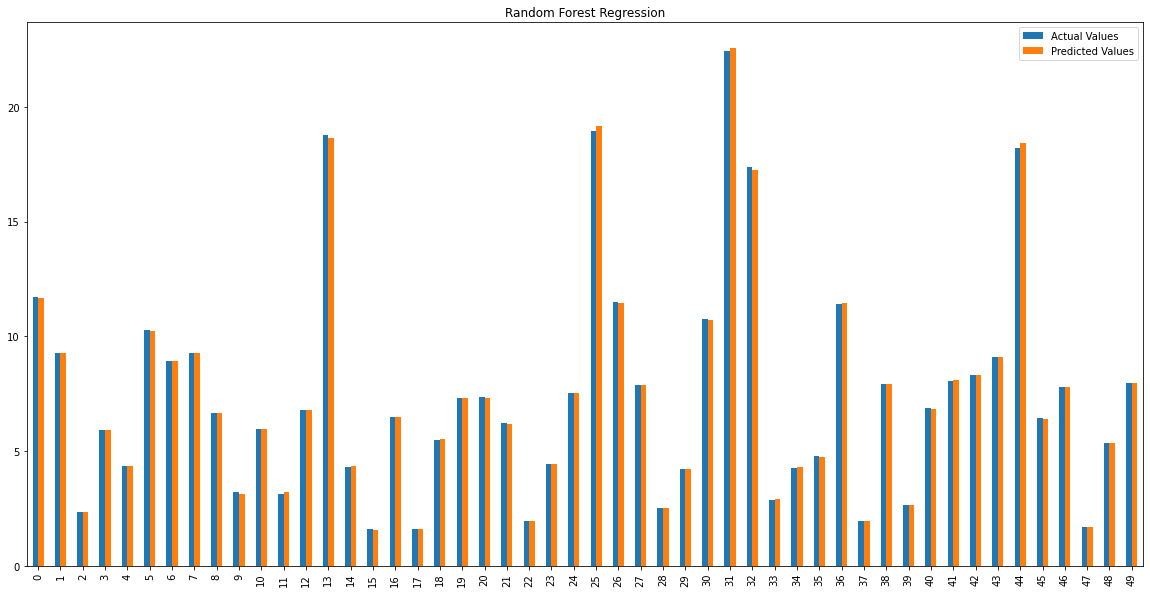

In [ ]:
df4.head(50).plot(kind="bar", figsize=(20, 10), title='Random Forest Regression')
plt.show()

**Visualize the results**

In [ ]:
accuracy1=r2_score(y_test,y_pred1)
accuracy2=r2_score(y_test,y_pred2)
accuracy3=r2_score(y_test,y_pred3)
accuracy4=r2_score(y_test,y_pred4)


In [ ]:
dict1 = {
    "Model": ["Simple Linear Regression", "Support Vector Regression", "Decision Tree Regression", "Random Forest Regression"],
    "Accuracy": np.array([accuracy1, accuracy2, accuracy3, accuracy4])
}
df = pd.DataFrame(dict1)
display(df.style.hide_index())

Model,Accuracy
Simple Linear Regression,0.999902
Support Vector Regression,0.999878
Decision Tree Regression,0.999693
Random Forest Regression,0.999826


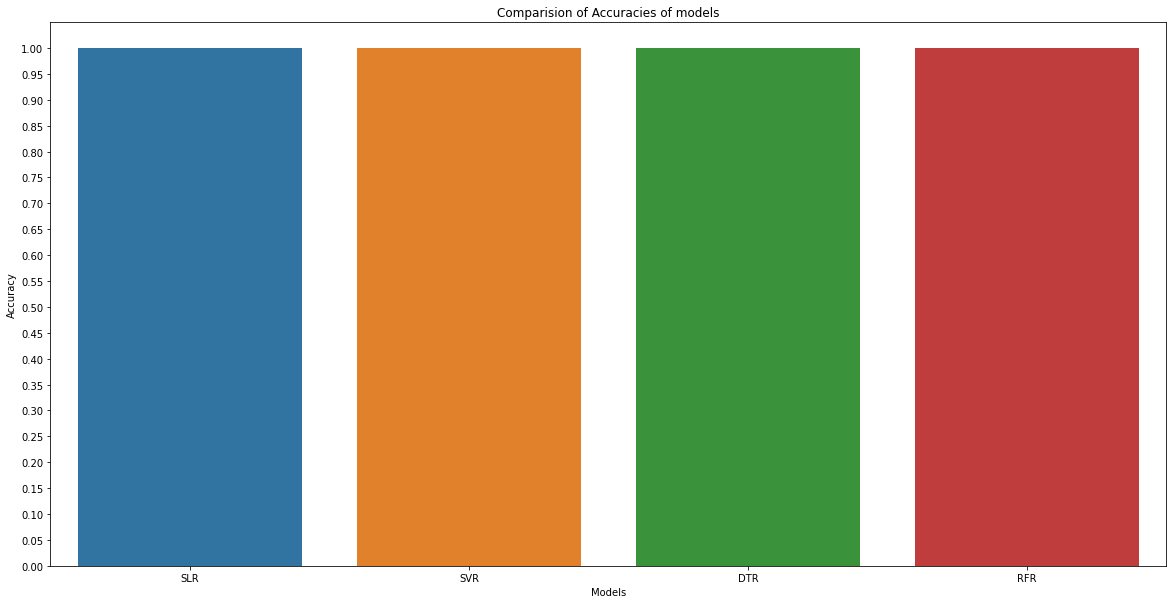

In [ ]:
models = ['SLR', 'SVR', 'DTR', 'RFR']
acc = [accuracy1, accuracy2, accuracy3, accuracy4]
plt.figure(figsize=(20, 10))
plt.title('Comparision of Accuracies of models')
plt.yticks(np.linspace(0,1,21))
plt.ylabel("Accuracy")
plt.xlabel("Models")
values = df.Accuracy
plot = sns.barplot(x=models, y=acc, data=values, errwidth=0)
plt.show()

**Save the model**

In [ ]:
import pickle

In [ ]:
with open('model1_lr.pkl', 'wb') as f:
    pickle.dump(model1, f) # Linear Regression model

with open('model2_svm.pkl', 'wb') as f:
    pickle.dump(model2, f)

with open('model3_dt.pkl', 'wb') as f:
    pickle.dump(model3, f)

with open('model4_rf.pkl', 'wb') as f:
    pickle.dump(model4, f)

